***Importing libraries for data analysis, data cleaning and data preprocessing.***

Datset : https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

***Loading training data***

In [107]:
train_data = pd.read_excel('Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**Knowing our data**

In [108]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [109]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [110]:
#For null values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [111]:
train_data.dropna(inplace = True)

In [112]:
train_data.shape

(10682, 11)

**EDA(Exploratory Data Analysis) And Data Preproccessing**

In the above data set time is given as an object, but to work with time, we will add the day and month column in the dataset.

In [113]:
train_data["Journey_day"] = pd.to_datetime(train_data['Date_of_Journey'], format = "%d/%m/%Y").dt.day

In [114]:
train_data["Journey_month"] = pd.to_datetime(train_data['Date_of_Journey'], format = "%d/%m/%Y").dt.month

In [115]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Journey_day      10682 non-null  int64 
 12  Journey_month    10682 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [116]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [117]:
#Date of journey will not be required , as all data is of same year
train_data.drop('Date_of_Journey', inplace = True, axis = 1)

In [118]:
#Departure time is when a plane leaves the gate
#Similar to Date_of_journey we can extract values from Dep_time
#Extracting hours
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

#Extracting minutes
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

#Now drop the dep_time
train_data.drop('Dep_Time', inplace = True, axis = 1)

In [119]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [120]:
#Departure time is when a plane leaves the gate
#Similar to Date_of_journey we can extract values from arrival_time
#Extracting hours
train_data['Arrival'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

#Extracting minutes
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

#Now drop the arrival_time
train_data.drop('Arrival_Time', inplace = True, axis = 1)

In [121]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


Extracting the hours and minutes from the "Duration column"

In [122]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
# print(duration[0],'\t', duration[1])
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
#

In [123]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [124]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [125]:
train_data.drop('Duration', axis = 1, inplace = True)

In [126]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


***Data preprocessing(Handling Categorical Data)***


1.Nominal data -> data not in any orde -->*One hot encoding*

2.Ordinal data -> data are in order -->*label encoding*

In [127]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

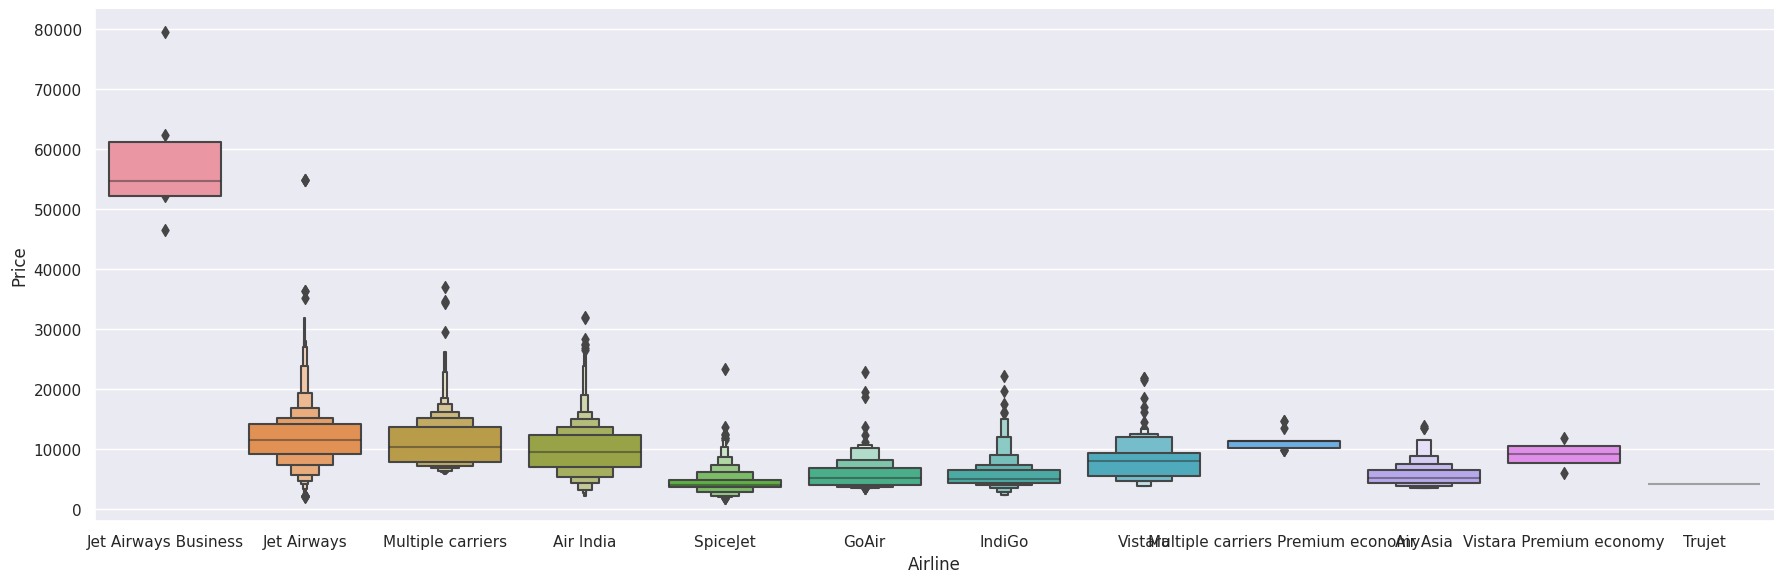

In [128]:
#Jet airlines business has the highest price
#Apart from the first airline almost all have the similar median
#Airline vs price
sns.catplot(y= "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind = "boxen", height = 6, aspect = 3)
plt.show()

<ipython-input-129-c46b60303636>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Airline', y = 'Price', data = train_data, ci = None)


Text(0.5, 0, 'Airline')

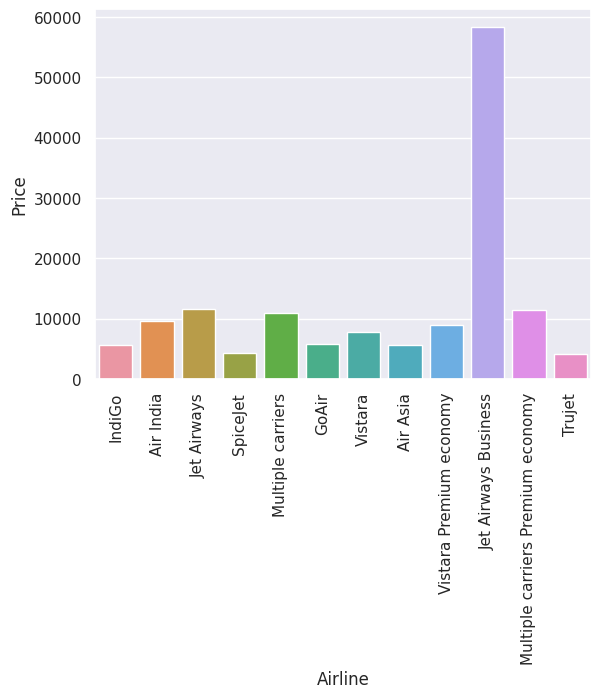

In [129]:
sns.barplot(x = 'Airline', y = 'Price', data = train_data, ci = None)
plt.xticks(rotation = 90)
plt.xlabel('Airline')

In [130]:
#As airline is Nomial Caegorical data we will perform OneHotEncoding
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [131]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

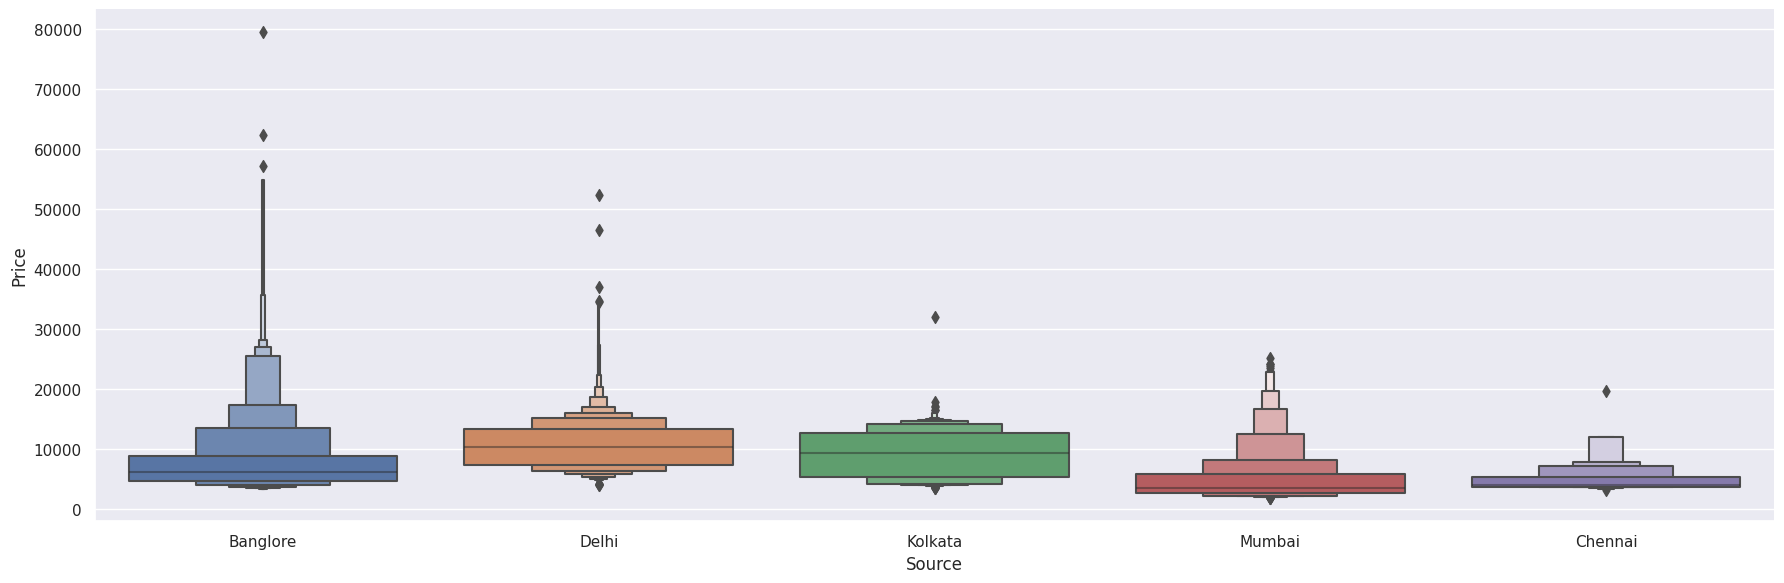

In [132]:
#Source vs price
sns.catplot(y= "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind = "boxen", height = 6, aspect = 3)
plt.show()

**One Hot Encoding**

In [133]:
#As airline is Nomial Caegorical data we will perform OneHotEncoding
Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [134]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

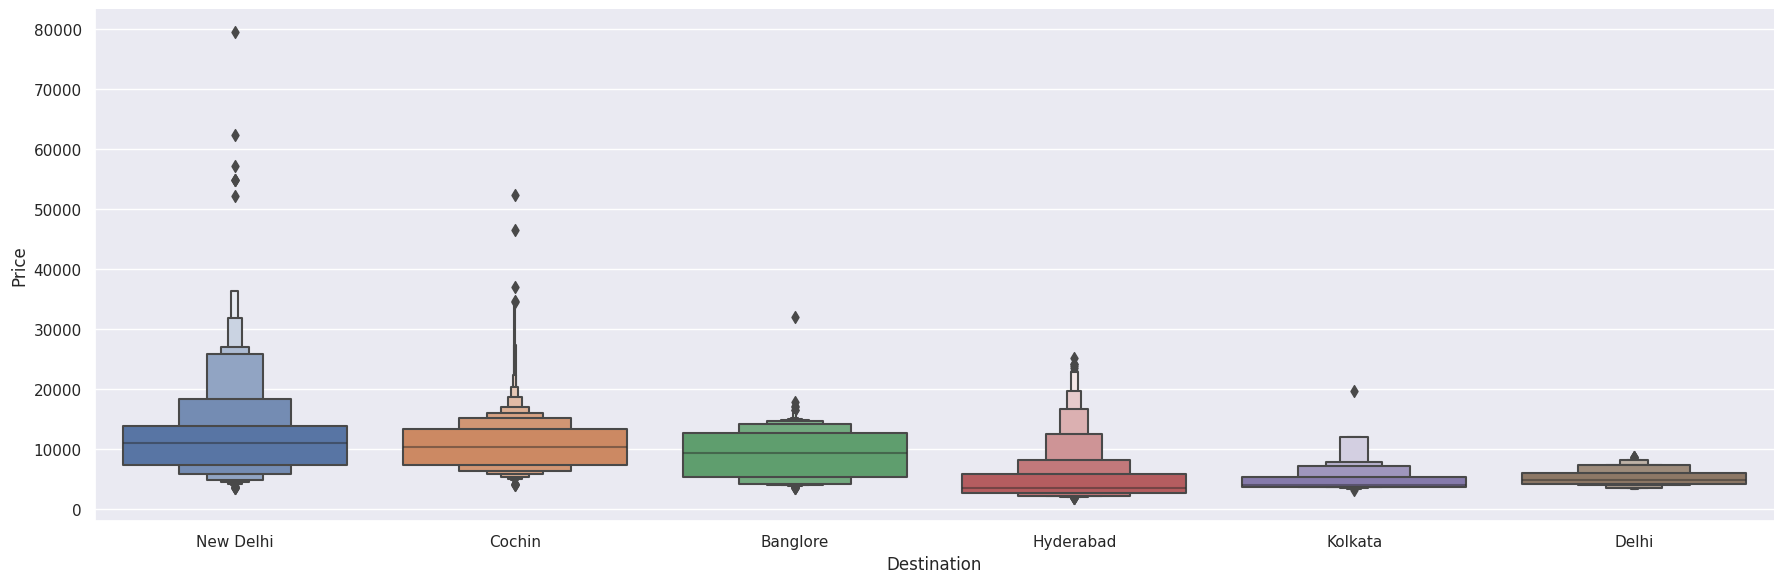

In [135]:
#Source vs price
sns.catplot(y= "Price", x = "Destination", data = train_data.sort_values("Price", ascending = False), kind = "boxen", height = 6, aspect = 3)
plt.show()

In [136]:
Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [137]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [138]:
#Additional info contains mostly no_info
#Route and Total_stops are related to each other
# train_data.drop(["Route, Additional_Info"], axis = 1, inplace = True)
train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [139]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

**Label Encoding on 'stops' feature.**

In [140]:
#As this is a ordered data so we will perform LabelEncoder
#Here Vaues are assigned with corresponding keys
train_data.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace = True)
#based on the data as the number of stops increases the price will increase

In [141]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [142]:
#Concatenate dataset airline+source+destination+traindata
train_data_new = pd.concat([train_data, Airline, Source, Destination], axis= 1)

In [143]:
train_data_new.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [144]:
train_data_new.drop(['Airline', 'Source','Destination'], inplace = True, axis = 1)

In [145]:
train_data_new.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [146]:
train_data_new.shape

(10682, 30)

**Note**

We are not combining the train and test data to prevent data leakage.

We dont want our model to see the  test data.

It could result in overfitting.

<ipython-input-147-530f2e84e99a>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Total_Stops', y = 'Price', data = train_data_new, alpha = 0.7, ci = None)


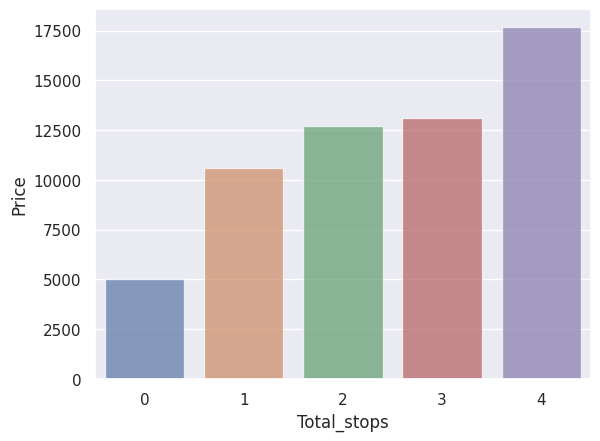

In [147]:
sns.barplot(x = 'Total_Stops', y = 'Price', data = train_data_new, alpha = 0.7, ci = None)
plt.xlabel('Total_stops')
plt.ylabel('Price')
plt.show()
#From the graph below we can see that the number of stops do affect the price of the flight.

**Exploring test data**

In [148]:
test_data = pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [149]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [150]:
#dropping null values
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


*Performing same feature engineering and data cleaning, that we applied to train data.*

In [151]:
# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data['Date_of_Journey'], format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [152]:
# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [153]:
# Categorical data

print("Airline")

print("******************************************************************************")

print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print("******************************************************************************")

print("Source")
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print("******************************************************************************")

print("Destination")
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

Airline
******************************************************************************
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
******************************************************************************
Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
******************************************************************************
Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [154]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)


**Label Encoding on test data on stops column**

In [155]:
# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [156]:
# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

In [157]:
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
print("Shape of test data : ", data_test.shape)

Shape of test data :  (2671, 28)


In [211]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


**Feature selection**

Finding out the best feature which will contribute and have good relation with target variable.

Following are some methods of feature selection

1)Heatmap

2)Feature_importance


In [158]:
train_data_new.shape

(10682, 30)

In [159]:
train_data_new.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

**X : Independent features**

**y : Target variable**

In [160]:
#X doesn't include size as price is the target variable and X is the independent features
X = train_data_new.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [161]:
y = train_data_new.iloc[:,1]

**Heat map for analysing the correlation among different features**

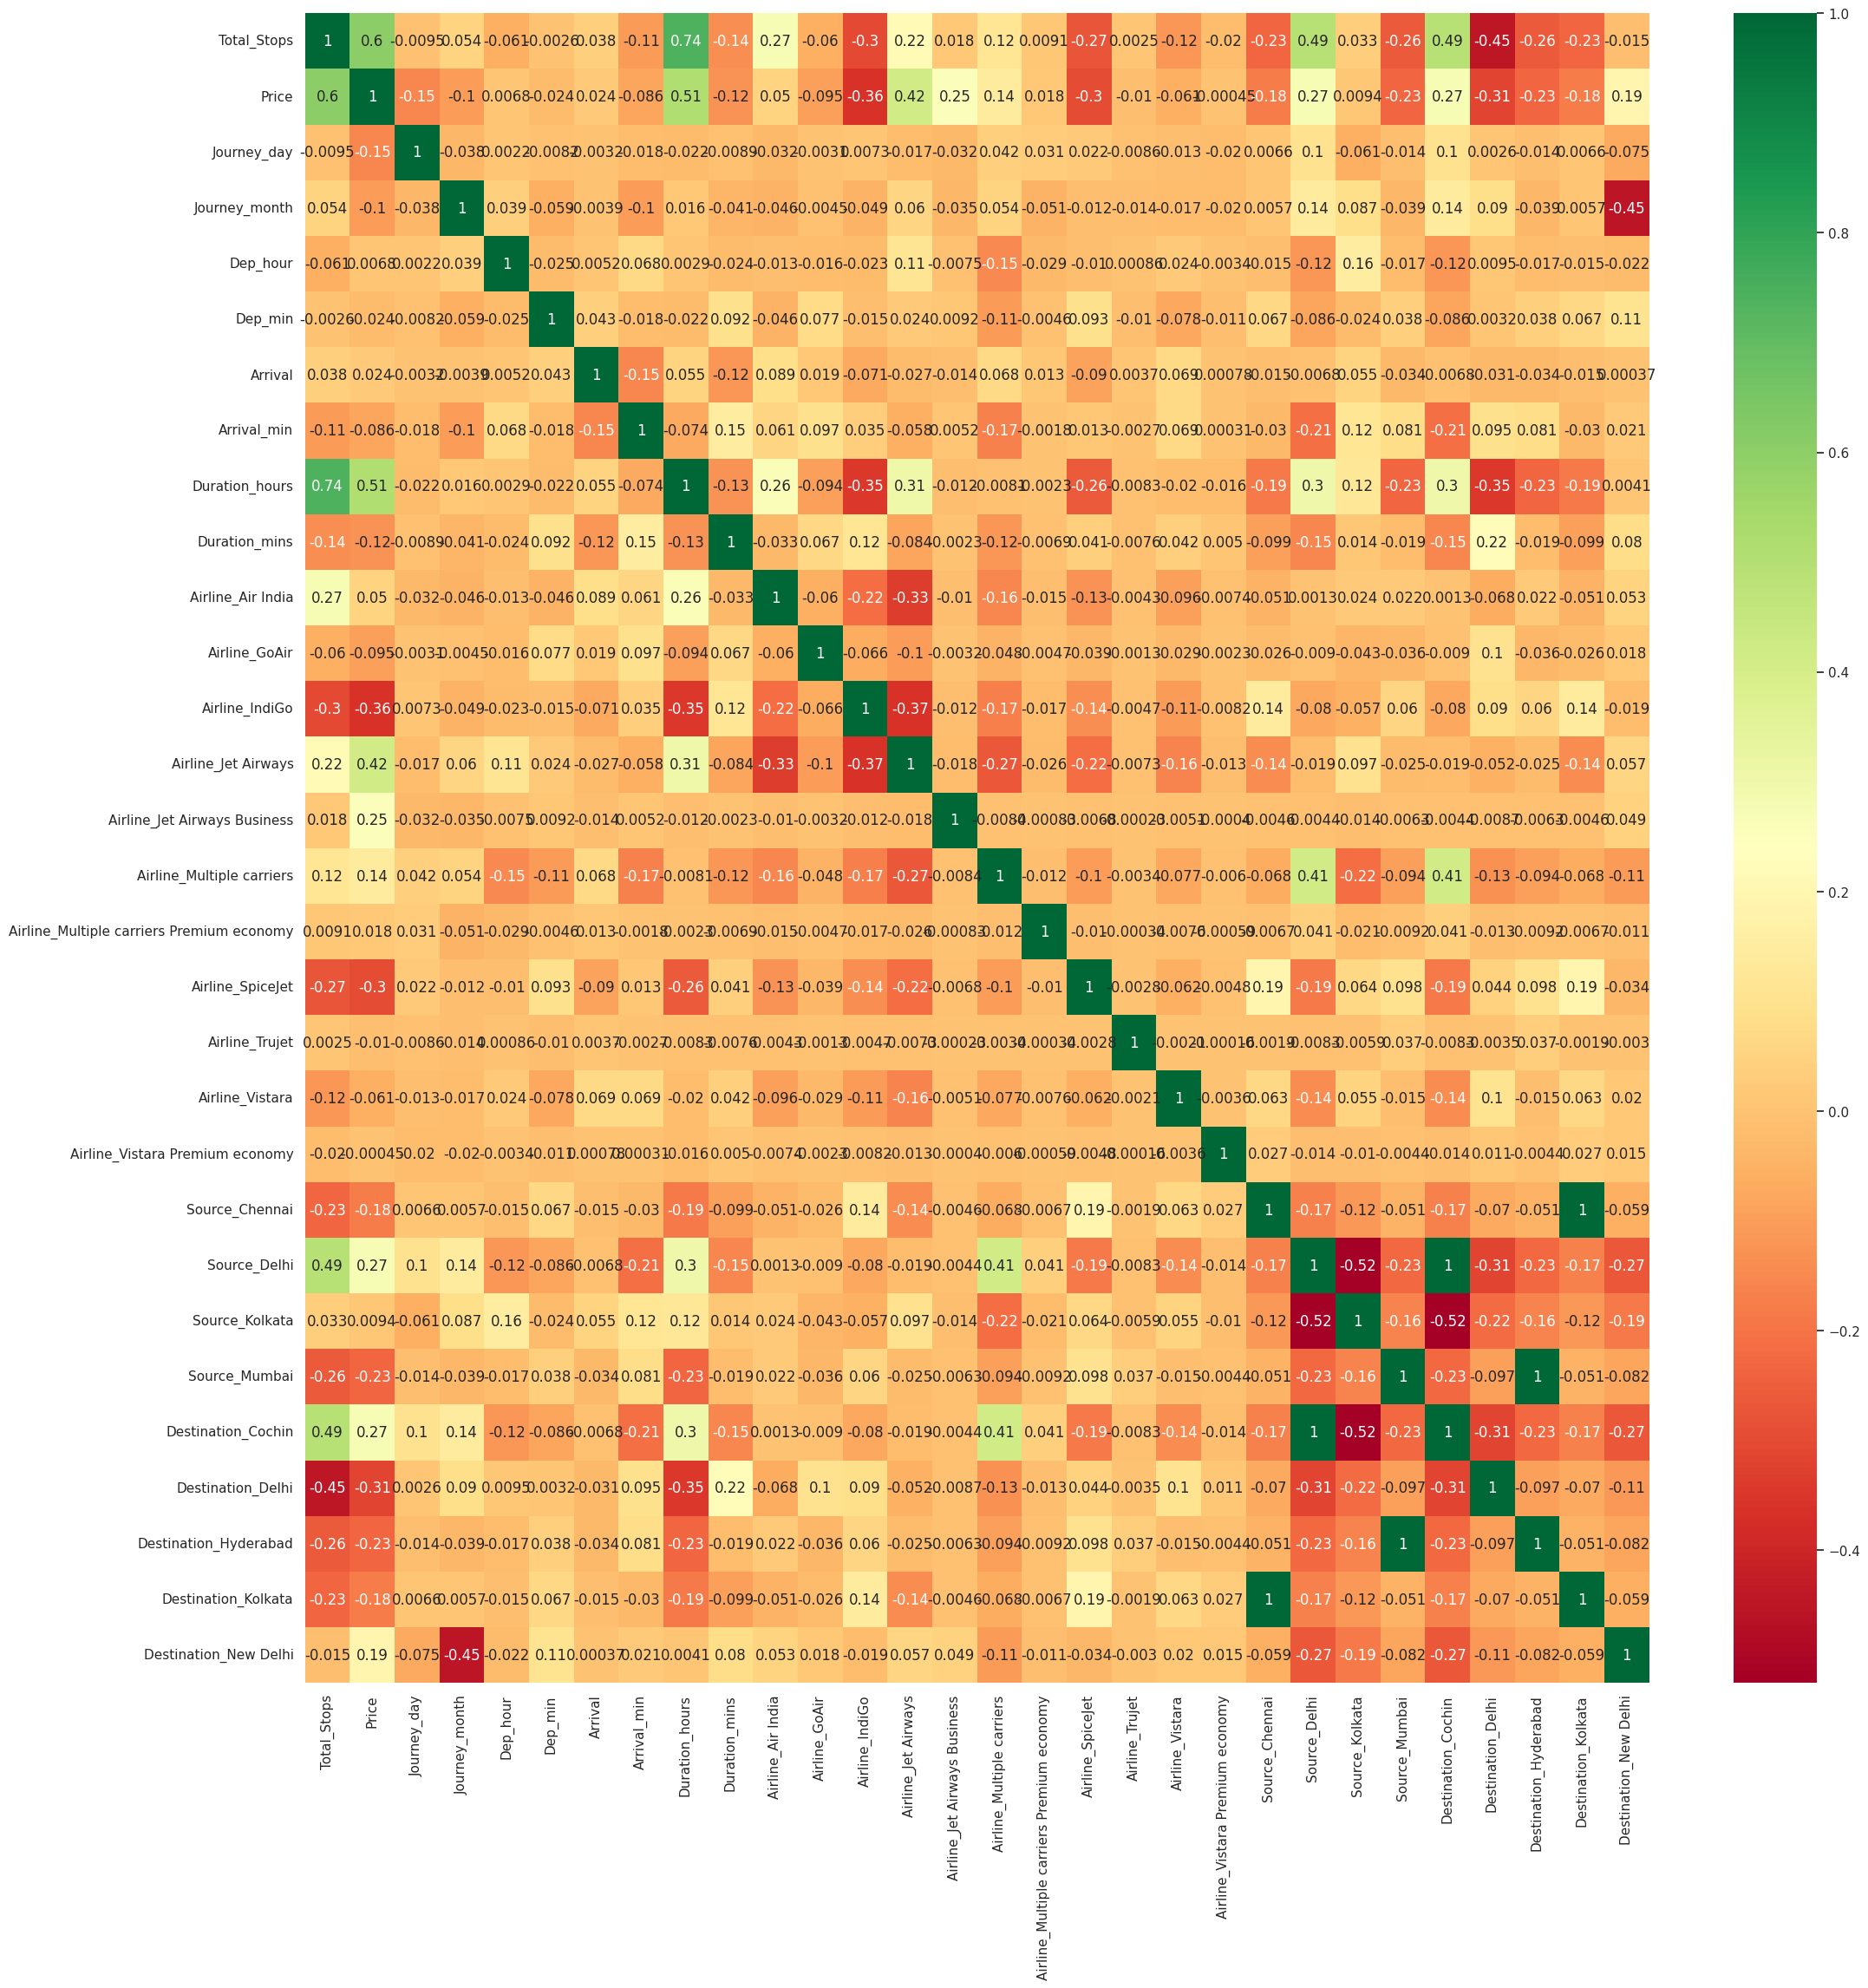

In [162]:
plt.figure(figsize = (25,25))
sns.heatmap(train_data_new.corr(), annot = True, cmap = "RdYlGn")
plt.show()

**Feature Engineering**

If features are highly correlated(I took the threshold of correlation to be 0.85), we will remove one of the features as they will contribute in similar manner to the model. And removing highly correlated features will also remove some noise in the data

In [163]:
# # what we can do if any of the features are highly correlated the we can drop one of them, as they will produce the same result
corr_matrix = train_data_new.corr()
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.85:
              correlated_features.add(corr_matrix.columns[i])

if correlated_features:
      train_data_new.drop(correlated_features, axis = 1, inplace = True)

In [164]:
train_data_new.shape

(10682, 27)

**Extra tree regressor for feature importance**

In [165]:
#extra tree regressor is used for finding feature importance
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [166]:
print(selection.feature_importances_)

[2.43849902e-01 1.44400669e-01 5.24539641e-02 2.38130036e-02
 2.09180093e-02 2.90120217e-02 1.95352335e-02 1.10706233e-01
 1.75841820e-02 1.01872525e-02 1.91885563e-03 1.73562087e-02
 1.35878815e-01 6.77553397e-02 1.84767768e-02 8.83750551e-04
 3.25608452e-03 1.10319283e-04 5.26610726e-03 8.70237285e-05
 4.85785458e-04 1.25845908e-02 3.29970791e-03 6.09867981e-03
 1.07288432e-02 1.18118606e-02 6.22383318e-03 5.40353158e-04
 2.47765941e-02]


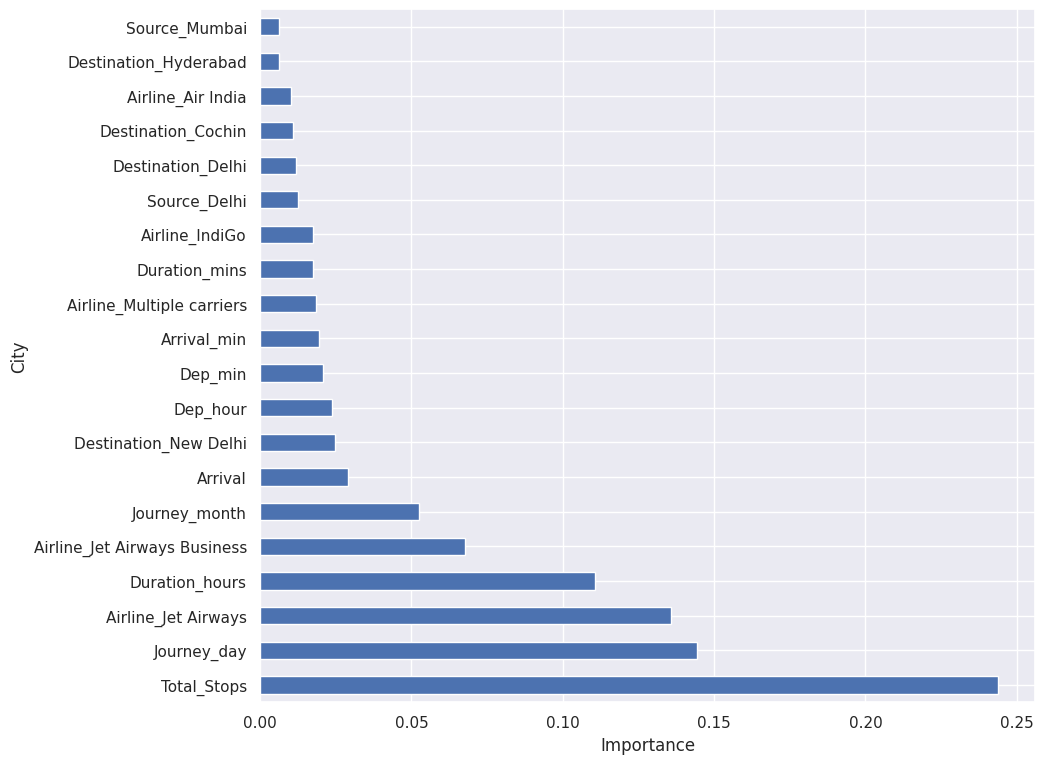

In [167]:
#plot graph of feature importances for better visuzlization
plt.figure(figsize = (10,9))
feature_importances = pd.Series(selection.feature_importances_, index = X.columns)
feature_importances.nlargest(20).plot(kind = 'barh')
plt.xlabel("Importance")
plt.ylabel("City")
plt.show()

**Machine learning**

Fitting model using regression models

Flow

1)Split datatest into train and test data

2)Scaling the features

3)Checking on metrics like  accuracy, rmse score, r2, to evaluate the model performancec



In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

**Random Forest Regressor**

In [169]:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [170]:
#Score on train data
model.score(X_train, y_train)

0.9531151633621212

In [171]:
#Score on test data
model.score(X_test, y_test)

0.8103409517179543

**Visualizing the performance by displot**

(A Distplot or distribution plot, depicts the variation in the data distribution.)



<ipython-input-172-e69523fd5a04>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


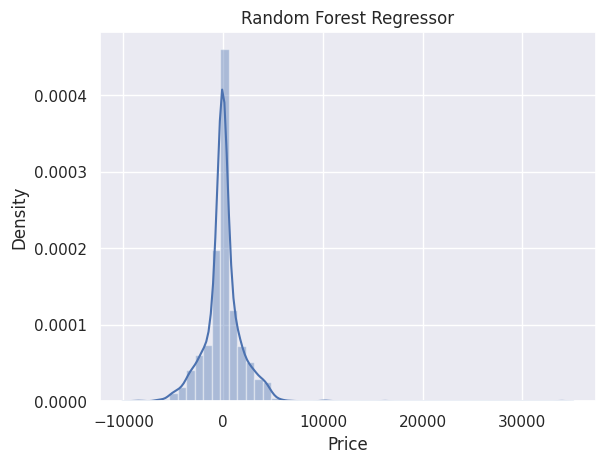

In [172]:
sns.distplot(y_test-y_pred)
plt.title("Random Forest Regressor")
plt.show()

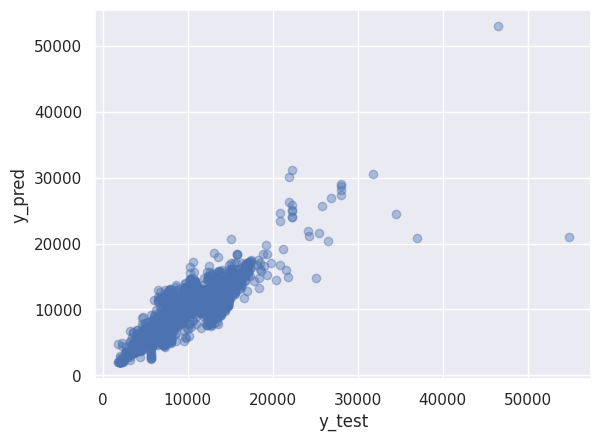

In [173]:
plt.scatter(y_test, y_pred, alpha = 0.4)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

**Evaluating model performance using regression metric**

In [174]:
from sklearn import metrics
print("Metrics when no parameters in random forest are used")
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2-score: ",metrics.r2_score(y_test, y_pred))

Metrics when no parameters in random forest are used
MAE:  1209.537832491457
MSE:  3890038.0226119077
RMSE:  1972.3179314227987
R2-score:  0.8103409517179543


**Hyperparameter tuning**

1)Randomized search cv -- fast

2)Grid search cv

In [175]:
y_pred.shape

(2137,)

In [176]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#Number of features to consider at every split
max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

min_samples_split = [2,5,10,15,50,75,100]

min_samples_leaf = [1,2,5,6,7,8,10]

In [177]:
from sklearn.model_selection import RandomizedSearchCV
#create random grid
random_grid = {'n_estimators' : n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}

In [178]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,  scoring = 'neg_mean_squared_error', n_iter = 10, cv= 5, verbose= 2, random_state = 1, n_jobs= 1)

In [ ]:
rf_random.fit(X_train, y_train)

In [180]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [181]:
prediction = rf_random.predict(X_test)

In [182]:
#Using best features in random forest
model_new_rf = RandomForestRegressor(n_estimators = 500,
                                     min_samples_split =  5,
                                     min_samples_leaf = 1,
                                     max_features = 'auto',
                                     max_depth = 30)
model_new_rf.fit(X_train, y_train)
y_pred_model_new_rf = model_new_rf.predict(X_test)

model_new_rf.score(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.9367119987516114

In [183]:
print("Metrics when best params are used")
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred_model_new_rf))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred_model_new_rf))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_model_new_rf)))
print("R2-score: ",metrics.r2_score(y_test, y_pred_model_new_rf))


Metrics when best params are used
MAE:  1172.2685090853229
MSE:  3674603.844671793
RMSE:  1916.9256231455076
R2-score:  0.8208444586035022


In [184]:
predict_using_best_pramas = model_new_rf.predict(X_train)

**Compairing Rnadom forest before and after hyperparameter tuning**



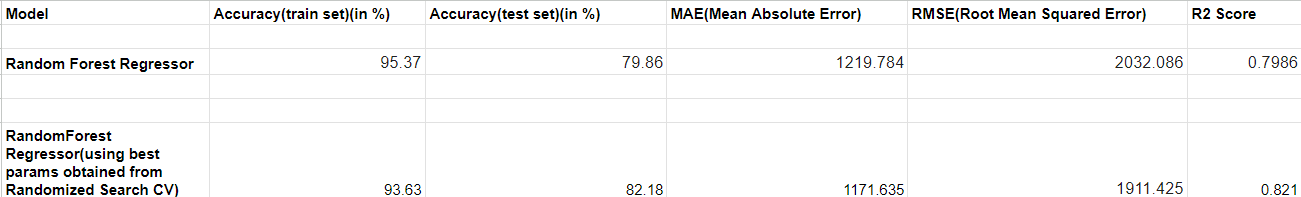

**LASSO Regression  Model**

**NOTE**


The line from scipy.stats import uniform is used to import the uniform distribution from the scipy.stats module.

***In the context of hyperparameter tuning, RandomizedSearchCV requires a probability distribution to sample values from when searching the hyperparameter space. The uniform distribution provides a continuous probability distribution where all values within a specified range are equally likely to be sampled.***

By importing uniform from scipy.stats, we can define a parameter distribution for the alpha parameter in Lasso that spans a specific range of values. In the example code, the uniform(0.1, 10) distribution is used, which means alpha values will be uniformly sampled from the range [0.1, 10].

Using a continuous distribution like uniform allows RandomizedSearchCV to sample a wide range of values for the alpha parameter during the hyperparameter search, which can help find a more optimal value.

In [186]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
lasso = Lasso()

param_dist = {'alpha':uniform(0.1, 10)}

random_search = RandomizedSearchCV(lasso, param_distributions = param_dist, n_iter = 100, cv = 5, random_state = 1)
random_search.fit(X_train, y_train)
best_alpha = random_search.best_params_['alpha']
print(best_alpha)

0.10114374817344887


In [188]:
from sklearn.metrics import r2_score, mean_squared_error
lasso_new = Lasso(alpha = best_alpha)
lasso_new.fit(X_train, y_train)

train_predictions = lasso_new.predict(X_train)
test_predictions = lasso_new.predict(X_test)


test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_r2 = r2_score(y_test, test_predictions)
test_mae = metrics.mean_absolute_error(y_test,test_predictions)

print("\nMetrics Lasso:")
print("RMSE:", test_rmse)
print("R2 Score:", test_r2)
print("MAE: ", metrics.mean_absolute_error(y_test,test_predictions))
print("MSE: ", metrics.mean_squared_error(y_test, test_predictions))


Metrics Lasso:
RMSE: 2864.84081450933
R2 Score: 0.5998519440960934
MAE:  1953.3922663578383
MSE:  8207312.892478481


In [209]:
print("Lasso train score: ", lasso_new.score(X_train, y_train))
print("Lasso test score: ", lasso_new.score(X_test, y_test))

Lasso train score:  0.6287112447101588
Lasso test score:  0.5998519440960934


<ipython-input-190-0c6465ae508c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - test_predictions)


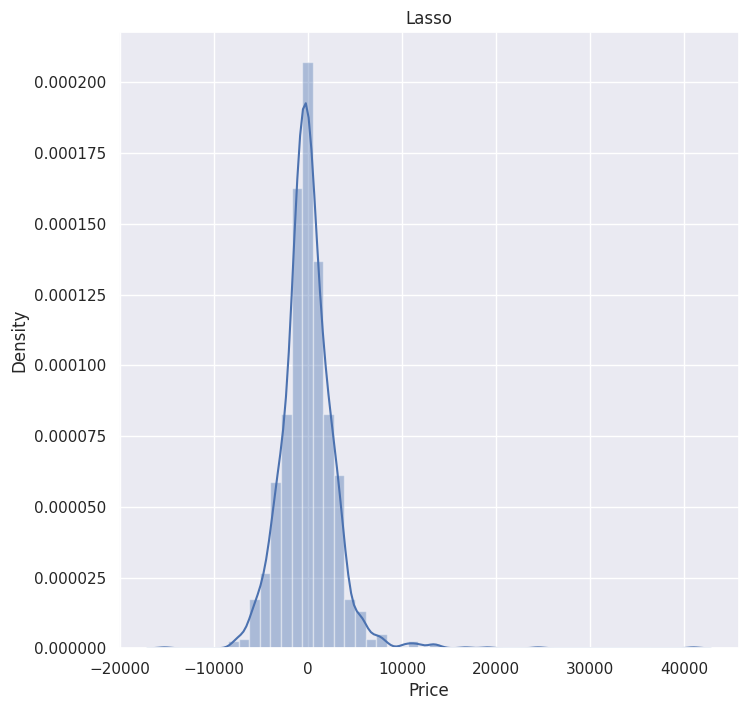

In [190]:
plt.figure(figsize = (8,8))
sns.distplot(y_test - test_predictions)
plt.title('Lasso')
plt.show()

**ElasticNet**

In [192]:
from sklearn.linear_model import ElasticNet
elast = ElasticNet(alpha = best_alpha, l1_ratio = 0.67, max_iter = 200, random_state = 1, selection = "random")
elast.fit(X_train, y_train)

train_predictions_elast = lasso_new.predict(X_train)
test_predictions_elast = lasso_new.predict(X_test)

test_rmse_elast = np.sqrt(mean_squared_error(y_test, test_predictions_elast))
test_r2_elast = r2_score(y_test, test_predictions)
test_mae_elast = metrics.mean_absolute_error(y_test,test_predictions_elast)

print("\nElastic Net:")
print("RMSE:", test_rmse_elast)
print("R2 Score:", test_r2_elast)
print("MAE: ", test_mae_elast)


Elastic Net:
RMSE: 2864.84081450933
R2 Score: 0.5998519440960934
MAE:  1953.3922663578383


In [208]:
print("Elastic net train score: ", elast.score(X_train, y_train))
print("Elastic net test score: ", elast.score(X_test, y_test))

Elastic net train score:  0.555059362824845
Elastic net test score:  0.5680164651601687


<ipython-input-193-99af963c0f56>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - test_predictions_elast)


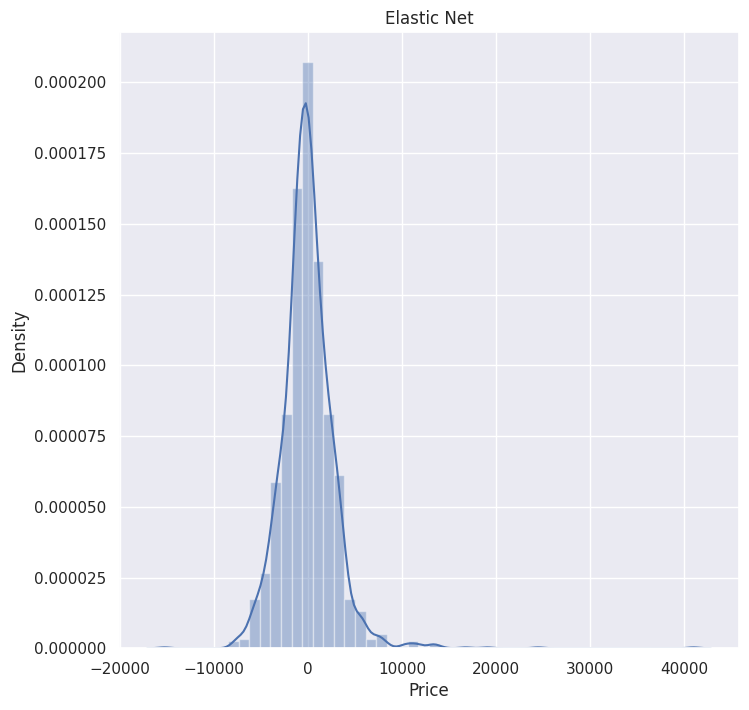

In [193]:
plt.figure(figsize = (8,8))
sns.distplot(y_test - test_predictions_elast)
plt.title('Elastic Net')
plt.show()

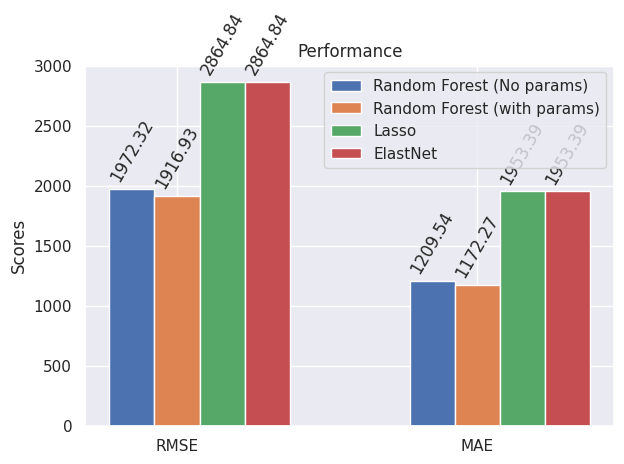

In [206]:
import numpy as np
import matplotlib.pyplot as plt

metrics_new = ['RMSE', 'MAE']
random_forest__no_params_scores = [random_forest_rmse_no_params, random_forest_mae_no_params]
random_forest__with_params_scores = [random_forest_rmse_with_params, random_forest_mae_with_params]
lasso_scores = [lasso_rmse, lasso_mae]
elast_net_score = [test_rmse_elast, test_mae_elast]

x = np.arange(len(metrics_new))
width_rmse = 0.15  # Width for RMSE bars
width_mae = 0.15   # Width for MAE bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width_rmse, random_forest__no_params_scores, width_rmse, label='Random Forest (No params)')
rects2 = ax.bar(x, random_forest__with_params_scores, width_rmse, label='Random Forest (with params)')
rects3 = ax.bar(x + width_rmse, lasso_scores, width_mae, label='Lasso')
rects4 = ax.bar(x + 2 * width_rmse, elast_net_score, width_mae, label='ElastNet')

ax.set_ylabel('Scores')
ax.set_title('Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics_new)
ax.legend()

# Function to label each bar with its respective value
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom',rotation=60)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()  # Adjusts spacing between subplots to avoid overlap
plt.show()


**Final results of all models**


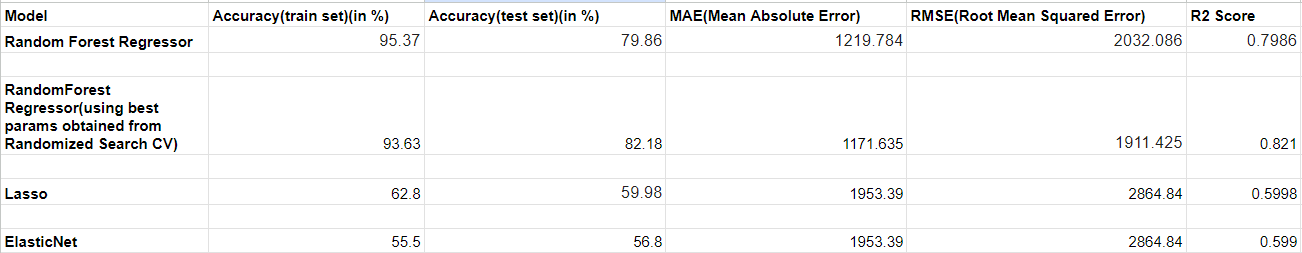

**Result and Obervations**

1)Random forest with hyperparameter showed the best performance, with an accuracy of about 82.18% on the test set

2)The top 2 factors which affected the air fare most are
  

* Total stops
* Journey_day


